# **Author - Iril Veneza**

#Task 6#
#Prediction using Decision tree Algorithm 

## Data preprocessing

In [23]:
#importing reqired libraries with required dataset
import seaborn as sns
import pandas as pd
import numpy as np
iris=sns.load_dataset('iris')

In [24]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Checking for null values** 

In [ ]:
iris.isnull().sum() 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**Handling duplicate data**

In [ ]:
#finding duplicates
iris_dup = iris[iris.duplicated()] 
print(iris_dup)

     sepal_length  sepal_width  petal_length  petal_width    species
142           5.8          2.7           5.1          1.9  virginica


In [ ]:
#dropping duplicates
iris=iris.drop_duplicates()

**Data Standardization**

In [ ]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     49
Name: species, dtype: int64

**Clearly there's only three types of flowers under observation.** 

**Checking for outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

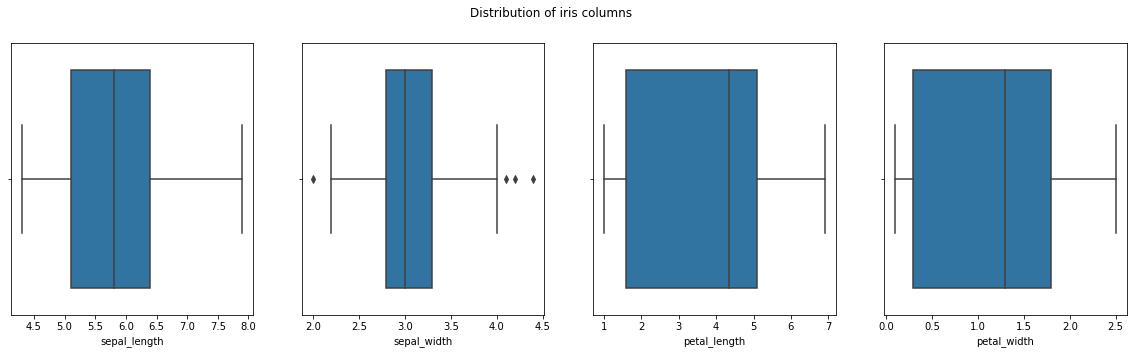

In [60]:
# build the box plot
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
fig.suptitle('Distribution of iris columns')

sns.boxplot('sepal_length', data= iris, ax=axes[0])
sns.boxplot('sepal_width', data= iris, ax=axes[1],)
sns.boxplot('petal_length', data= iris, ax=axes[2])
sns.boxplot('petal_width', data= iris, ax=axes[3])

sepal_width has some outliers 

In [69]:
#dealing with outliers with interquartile range
QR1,QR3 = np.percentile(iris['sepal_width'],[25,75])
IQR = QR3-QR1
LB = QR1- 1.5*IQR
UB = QR3+ 1.5*IQR


iris['sepal_width']= np.where(iris['sepal_width'] <UB, UB,iris['sepal_width']) # where(condition,[x,y])
iris['sepal_width'] = np.where(iris['sepal_width'] >LB, LB,iris['sepal_width'])
#iris=iris.drop(iris['sepal_width']==out)

# Data preparation for the ML

In [70]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split


In [71]:
# adding a label encoder for the species column as sklearn learns with numbers 
iris['species_n']= LabelEncoder().fit_transform(iris['species'])

#creating the input and target dataset
iris_input= iris.drop(['species','species_n'], axis=1)
iris_target= iris['species_n']

In [72]:
# splitting datasets into training and test dataset
input_train, input_test, target_train, target_test=train_test_split(iris_input, iris_target, test_size=0.15)

# Using the Decision tree Algorithm

In [73]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(input_train,target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Checking accuracy of predictions

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [75]:
predictions=model.predict(input_test)# 0 - seriosa , 1 - versicolour, 2- virginica

#calculating the prediction score of model
score= accuracy_score(target_test, predictions)
print("The model can predict with an accuracy of",round(score*100,2),"%")

The model can predict with an accuracy of 95.65 %


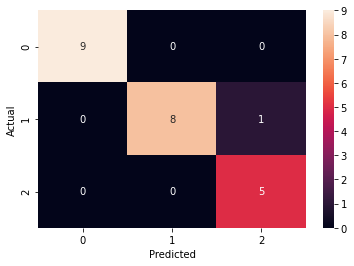

In [76]:
#accuracy of model while prediction using confusion matrix
confusion_matrix = pd.crosstab(target_test, predictions, rownames=['Actual'], colnames=['Predicted'] )
sns.heatmap(confusion_matrix, annot=True)

# Visualizing the Decision Tree

[Text(372.0, 996.6, 'X[3] <= 0.8\ngini = 0.666\nsamples = 127\nvalue = [41, 41, 45]'),
 Text(279.0, 815.4000000000001, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(465.0, 815.4000000000001, 'X[3] <= 1.75\ngini = 0.499\nsamples = 86\nvalue = [0, 41, 45]'),
 Text(372.0, 634.2, 'X[2] <= 4.95\ngini = 0.194\nsamples = 46\nvalue = [0, 41, 5]'),
 Text(186.0, 453.0, 'X[3] <= 1.65\ngini = 0.049\nsamples = 40\nvalue = [0, 39, 1]'),
 Text(93.0, 271.79999999999995, 'gini = 0.0\nsamples = 39\nvalue = [0, 39, 0]'),
 Text(279.0, 271.79999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(558.0, 453.0, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(465.0, 271.79999999999995, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(651.0, 271.79999999999995, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(558.0, 90.59999999999991, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(744.0, 90.59999999999991, 'gini = 0.0\nsamples = 1\nvalue =

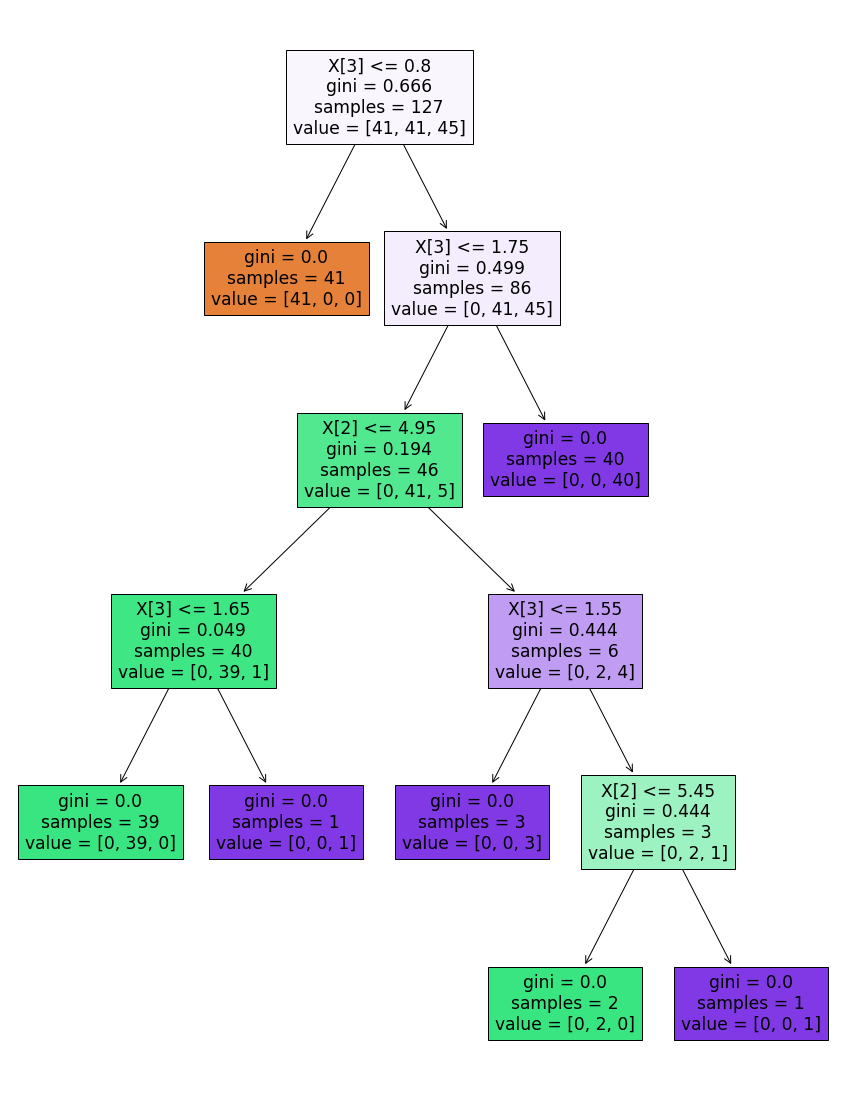

In [78]:
import matplotlib.pyplot as plt
from sklearn import tree
#plotting the tree
plt.figure(figsize=(15,20))
tree.plot_tree(model,filled= True)